In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np
texts=['I love deep learning and love AI','Deep learning is amazing','I love AI']
tokenizer=Tokenizer()
tokenizer.fit_on_texts(texts) # tokenizer物件針對文字進行訓練
sequences=tokenizer.texts_to_sequences(texts)
print('數值序列：',sequences)
word_index=tokenizer.word_index
print('詞彙與索引對照表：',word_index)
print('想要得到一個one hot編碼')
print('得先知道索引值大小')
vocab_size=len(word_index)+1
print('將序列轉換為向量')
one_hot_results=[to_categorical(seq,num_classes=vocab_size) for seq in sequences]
print(one_hot_results)
print('進一步顯示')
for i,one_hot in enumerate(one_hot_results):
    print(f'句子{i+1}的one hot編碼：')
    print(one_hot)

數值序列： [[2, 1, 3, 4, 6, 1, 5], [3, 4, 7, 8], [2, 1, 5]]
詞彙與索引對照表： {'love': 1, 'i': 2, 'deep': 3, 'learning': 4, 'ai': 5, 'and': 6, 'is': 7, 'amazing': 8}
想要得到一個one hot編碼
得先知道索引值大小
將序列轉換為向量
[array([[0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]]), array([[0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]]), array([[0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]])]
進一步顯示
句子1的one hot編碼：
[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0.

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np
texts=['I love deep learning and love AI','Deep learning is amazing','I love AI']
tokenizer=Tokenizer()
tokenizer.fit_on_texts(texts) # tokenizer物件針對文字進行訓練
sequences=tokenizer.texts_to_sequences(texts)
print('數值序列：',sequences)
word_index=tokenizer.word_index
print('詞彙與索引對照表：',word_index)
print('想要得到一個one hot編碼')
print('將序列轉換為向量')
one_hot_matrix=tokenizer.texts_to_matrix(texts,mode='binary')
print(one_hot_matrix)

數值序列： [[2, 1, 3, 4, 6, 1, 5], [3, 4, 7, 8], [2, 1, 5]]
詞彙與索引對照表： {'love': 1, 'i': 2, 'deep': 3, 'learning': 4, 'ai': 5, 'and': 6, 'is': 7, 'amazing': 8}
想要得到一個one hot編碼
將序列轉換為向量
[[0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0.]]


In [3]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
texts=['cat','dog','bird','cat']
texts_array=np.array(texts).reshape(-1,1)
hot1=OneHotEncoder(sparse_output=False)
print('必須規劃為DataFrame的資料，不然無法做轉換處理')
hot2=hot1.fit_transform(texts_array)
print(hot2)

必須規劃為DataFrame的資料，不然無法做轉換處理
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus=['This is the first document.','this document is the second document.','And this is the third one.','Is this the first document?']
vectorizer=CountVectorizer(lowercase=False)
X=vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['And' 'Is' 'This' 'document' 'first' 'is' 'one' 'second' 'the' 'third'
 'this']
[[0 0 1 1 1 1 0 0 1 0 0]
 [0 0 0 2 0 1 0 1 1 0 1]
 [1 0 0 0 0 1 1 0 1 1 1]
 [0 1 0 1 1 0 0 0 1 0 1]]


In [5]:
import jieba
from collections import Counter
texts=["我愛自然語言處理","機器學習是人工智慧的一部分","資料分析與資料挖掘"]
def segment_texts(texts):
  segment_texts=[]
  for text in texts:
    words=list(jieba.cut(text))
    segment_texts.append(words)
  return segment_texts
def generate_ngram(words,n):
  ngram_list=zip(*[words[i:] for i in range(n)])
  ngram_list=[' '.join(ngram) for ngram in ngram_list]
  return ngram_list
def process_texts(texts,n):
  all_ngrams=[]
  segmented_texts=segment_texts(texts)
  for words in segmented_texts:
    ngrams=generate_ngram(words,n)
    all_ngrams.extend(ngrams)
  return all_ngrams
n=3
all_ngrams=process_texts(texts,n)
print('所有字串的',n,'-grams的結果：')
print(all_ngrams)
counter=Counter(all_ngrams)
print('所有字串的',n,'-grams的頻率計算：')
print(counter)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.331 seconds.
DEBUG:jieba:Loading model cost 2.331 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


所有字串的 3 -grams的結果：
['我 愛 自然', '愛 自然 語言', '自然 語言 處理', '機器 學習 是', '學習 是 人工智慧', '是 人工智慧 的', '人工智慧 的 一部分', '資料 分析 與', '分析 與 資料', '與 資料 挖掘']
所有字串的 3 -grams的頻率計算：
Counter({'我 愛 自然': 1, '愛 自然 語言': 1, '自然 語言 處理': 1, '機器 學習 是': 1, '學習 是 人工智慧': 1, '是 人工智慧 的': 1, '人工智慧 的 一部分': 1, '資料 分析 與': 1, '分析 與 資料': 1, '與 資料 挖掘': 1})


In [6]:
import jieba
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import Pipeline
data=[("我愛看棒球比賽","運動"),("今天股市大漲","財經"),("新型晶片技術突破","科技"),("籃球比賽非常激烈","運動"),("經濟發展迅速","財經"),("人工智慧改變生活","科技")]
print('分類結果與分類的資料都是文字，全部都要轉換為數字嗎?')
print('依照資料來做評估，如果不需要做one hot轉換，不需要轉換為數字')
print('可評估詞彙的重要性來進行skleran分類，但是如果字串太多或程式執行緩慢，請改用神經網路方式進行')
texts,labels=zip(*data) # 將data資料拆解分別儲存至texts與labels
def chinese_tokenizer(text):
  return jieba.lcut(text)
pipeline=Pipeline([('vectorizer',TfidfVectorizer(tokenizer=chinese_tokenizer,ngram_range=(1,4))),('classifier',MultinomialNB())])
X_train,X_test,y_train,y_test=train_test_split(texts,labels,test_size=0.2,random_state=42)
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)
print('預測結果：')
print(y_pred)
print('實際結果：')
print(y_test)
print('準確率：')
print(accuracy_score(y_test,y_pred))
print('詳細分類報告：')
print(classification_report(y_test,y_pred))
new_text=['美律董座申報轉讓持股，市值達1.72億元']
predicted1=pipeline.predict(new_text)
print('預測結果：')
print(predicted1)

分類結果與分類的資料都是文字，全部都要轉換為數字嗎?
依照資料來做評估，如果不需要做one hot轉換，不需要轉換為數字
可評估詞彙的重要性來進行skleran分類，但是如果字串太多或程式執行緩慢，請改用神經網路方式進行
預測結果：
['科技' '科技']
實際結果：
['運動', '財經']
準確率：
0.0
詳細分類報告：
              precision    recall  f1-score   support

          科技       0.00      0.00      0.00       0.0
          財經       0.00      0.00      0.00       1.0
          運動       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

預測結果：
['科技']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

In [7]:
!pip install jieba scikit-learn

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


字串: 我愛看棒球比賽  => 分群:  0
字串: 今天股市大漲  => 分群:  2
字串: 新型晶片技術突破  => 分群:  1
字串: 籃球比賽非常激烈  => 分群:  0
字串: 經濟發展迅速  => 分群:  1
字串: 人工智慧改變生活  => 分群:  1
字串: 量子運算是未來的趨勢  => 分群:  1
字串: 這次籃球比賽很精彩  => 分群:  0
字串: 股票市場出現波動  => 分群:  1
字串: 最新的科技新聞  => 分群:  1
0 我愛看棒球比賽 0.294945503111233 -0.015114402432103389
1 今天股市大漲 -0.1955636361461792 -0.2633898925364938
2 新型晶片技術突破 -0.1955636361461804 -0.26338989253660955
3 籃球比賽非常激烈 0.6384606389621349 0.07376370619622659
4 經濟發展迅速 -0.19556363614618125 -0.2633898925365991
5 人工智慧改變生活 -0.195563636146181 -0.26338989253663014
6 量子運算是未來的趨勢 -0.29318049385311756 0.5919597138187981
7 這次籃球比賽很精彩 0.6307730263637694 0.07438073128116397
8 股票市場出現波動 -0.19556363614618 -0.2633898925365356
9 最新的科技新聞 -0.29318049385311773 0.5919597138187829


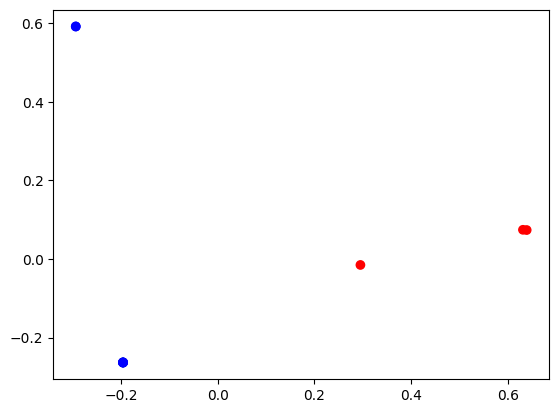

In [8]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
texts=["我愛看棒球比賽","今天股市大漲","新型晶片技術突破","籃球比賽非常激烈","經濟發展迅速","人工智慧改變生活","量子運算是未來的趨勢","這次籃球比賽很精彩","股票市場出現波動","最新的科技新聞"]
def chinese_tokenizer(text):
    return jieba.lcut(text)
vectorizer = TfidfVectorizer(tokenizer=chinese_tokenizer,ngram_range=(1,2))
X=vectorizer.fit_transform(texts)
num_clusters=3
kmeans=KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
labels=kmeans.labels_
for i, label in enumerate(labels):
    print("字串:",texts[i]," => 分群: ",label)
pca=PCA(n_components=2)
scatter_plot_points=pca.fit_transform(X.toarray())
colors=["r","b","g"]
x_axis=[o[0] for o in scatter_plot_points]
y_axis=[o[1] for o in scatter_plot_points]
fig,ax=plt.subplots()
ax.scatter(x_axis,y_axis,c=[colors[d] for d in labels])
for i, txt in enumerate(texts):
  print(i,txt,x_axis[i],y_axis[i])
plt.show()